In [5]:
import numpy as np
import math
import problem_description
%run problem_description.py

## Uncertainties

Velocity: 
- 0.5 L/min with uncertainty of 0.01 L/min <br>

Power: 
- 1.0 Watts with uncertainty of 0.01 Watts <br>
(1 [Watt] /13.1533 [mm^3] )*(1e^9[mm^3]/1[m]) 

## Input Uncertainties
Using Latin Hypercube sampling in Dakota to generate samples by propogating the uncertainty from 2 parameters: Inlet Volumetric Flow Rate, Applied power. 

Assuming applied power is turned on and off for 2seconds. 

In [6]:
vfr_power = pd.read_table('data/vfr_power.dat',sep="\s+")
vfr_timeToMaxPower = pd.read_table('data/vfr_timeToMaxPower.dat',sep="\s+")
vfr = vfr_power['VFR'] 
power = vfr_power['Power']
timeToMaxPower = vfr_timeToMaxPower['TimeToMaxPower']

In [7]:
samples = inputUncert(vfr,power,timeToMaxPower)
samples

,Sample,VFR (L/min),Velocity [m/s],Power [W],Power/volume [W/m^3],Time to Max Power [sec]
0,sample 1,0.494440,0.509050,0.999854,7.601546e+07,1.708276
1,sample 2,0.497275,0.511969,1.000266,7.604676e+07,2.531816
2,sample 3,0.506627,0.521597,0.999797,7.601110e+07,1.593601
3,sample 4,0.509589,0.524647,1.000491,7.606386e+07,2.981642
4,sample 5,0.491796,0.506329,1.000308,7.604999e+07,2.616563
5,sample 6,0.494134,0.508736,0.999897,7.601870e+07,1.793473
6,sample 7,0.507415,0.522408,1.000018,7.602795e+07,2.036836
7,sample 8,0.508372,0.523394,0.999688,7.600281e+07,1.375442
8,sample 9,0.499768,0.514536,1.000112,7.603504e+07,2.223488
9,sample 10,0.491104,0.505615,0.999987,7.602553e+07,1.973276


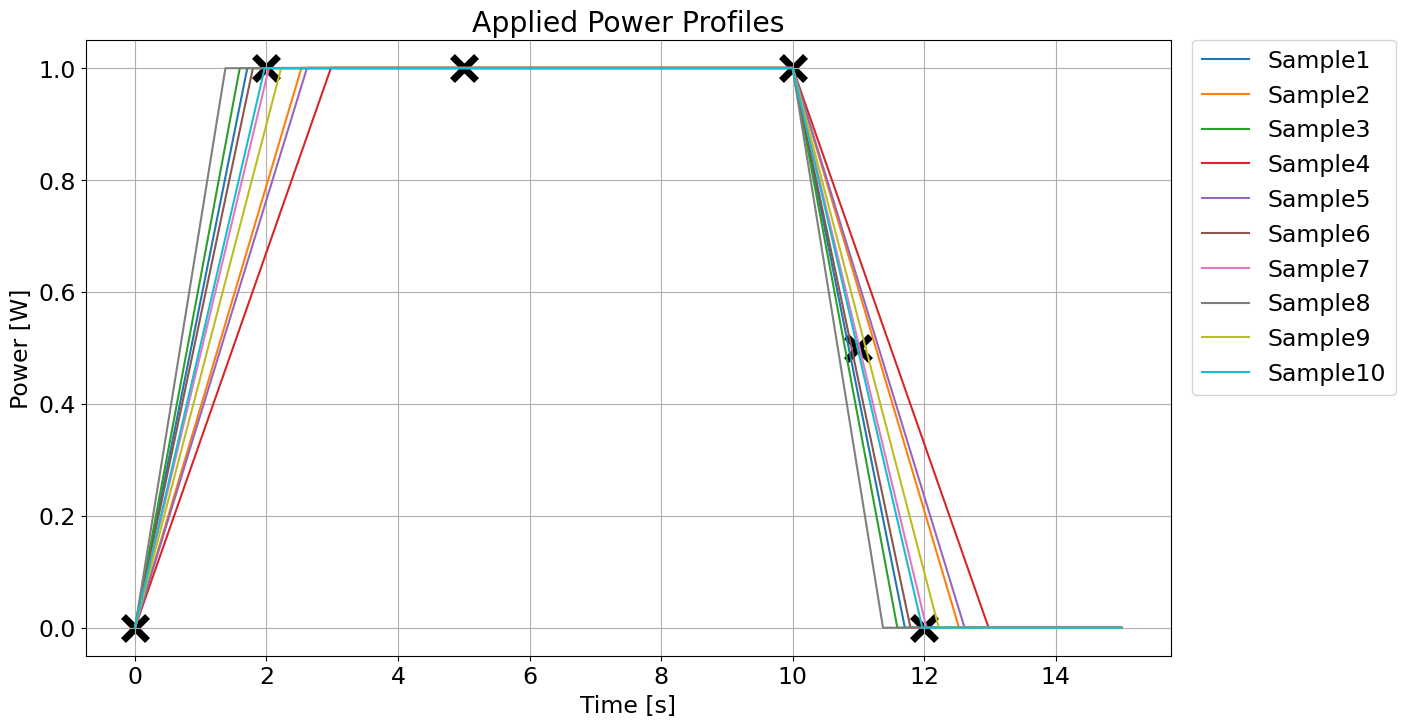

In [9]:
dataPowerS1 = pd.read_csv("data/data_power/sample1.csv")
dataPowerS2 = pd.read_csv('data/data_power/sample2.csv')
dataPowerS3 = pd.read_csv('data/data_power/sample3.csv')
dataPowerS4 = pd.read_csv('data/data_power/sample4.csv')
dataPowerS5 = pd.read_csv('data/data_power/sample5.csv')
dataPowerS6 = pd.read_csv('data/data_power/sample6.csv')
dataPowerS7 = pd.read_csv('data/data_power/sample7.csv')
dataPowerS8 = pd.read_csv('data/data_power/sample8.csv')
dataPowerS9 = pd.read_csv('data/data_power/sample9.csv')
dataPowerS10 = pd.read_csv('data/data_power/sample10.csv')
save = 'YES' #'YES'
powerprof(dataPowerS1,dataPowerS2,dataPowerS3,dataPowerS4,dataPowerS5,
          dataPowerS6,dataPowerS7,dataPowerS8,dataPowerS9,dataPowerS10, save)

In [4]:
### The following was used to convert the .out files to .dat files
input_file = 'data/LHS_samples_v1.out'
output_file = 'data/vfr_power.dat'
label = 'VFR Power'
convertDat(input_file,output_file,label)
input_file = 'data/LHS_samples_v5.out'
output_file = 'data/vfr_timeToMaxPower.dat'
label = 'VFR TimeToMaxPower'
convertDat(input_file,output_file,label)